In [8]:
# from fbprophet import Prophet
# import pandas as pd
# # Sample data (replace with your actual data)
# data = pd.DataFrame({
#   'ds': pd.date_range(start='2023-01-01', end='2023-12-31'),
#   'y': [10, 12, 15, 8, 11, 13, 18, 14, 10, 16, 19, 21]
# })

# # Create Prophet model
# model = Prophet()
# model.fit(data)

# # Define future dates for prediction (change the date range)
# future_dates = model.make_future_dataframe(periods=365)  # predict for next year

# # Make predictions
# forecast = model.predict(future_dates)

# # Print the forecast data
# print(forecast[['ds', 'yhat']])  # shows predicted values ('yhat') for each date ('ds')



import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [9]:

# Sample DataFrame creation
dfd=pd.read_csv("ITC_1.csv")
dfd
dates = pd.date_range(start='2000-01-03', end='2014-07-17')
values = dfd['value']
len(dates)
len(values)
df = pd.DataFrame({'date': dates, 'value': values})


ValueError: array length 5310 does not match index length 5315

d:\python programs\All\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Squared Error: 11475.439233651005


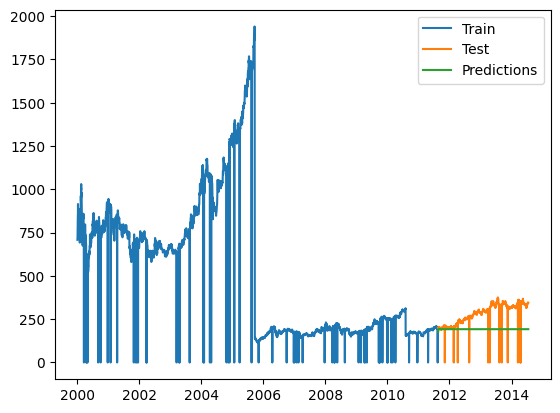

In [ ]:

# Splitting data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
order = (5, 1, 0)  # Example order, you need to tune this
model = ARIMA(train['value'], order=order)
fitted_model = model.fit()

# Forecast
start_index = len(train)
end_index = start_index + len(test) - 1
predictions = fitted_model.predict(start=start_index, end=end_index, typ='levels')

# Calculate error
mse = mean_squared_error(test['value'], predictions)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.plot(train['date'], train['value'], label='Train')
plt.plot(test['date'], test['value'], label='Test')
plt.plot(test['date'], predictions, label='Predictions')
plt.legend()
plt.show()

